# LangChain: Memory

## Outline
* ConversationBufferMemory
* ConversationBufferWindowMemory
* ConversationTokenBufferMemory
* ConversationSummaryMemory

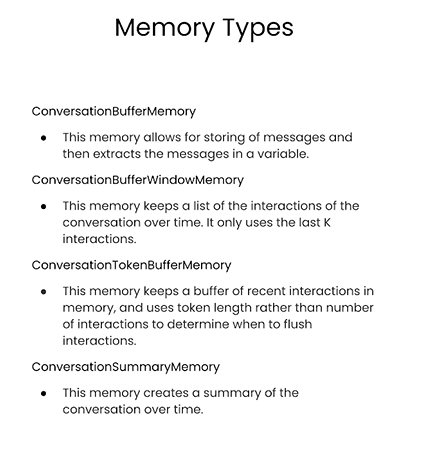
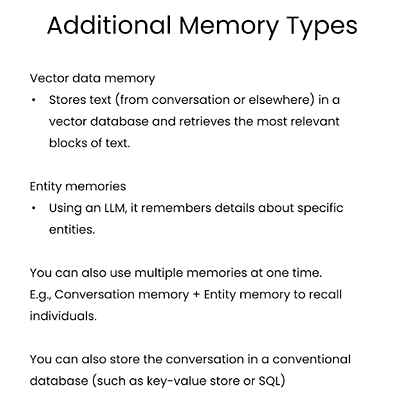

## ConversationBufferMemory

In [ ]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory


In [ ]:
llm = ChatOpenAI(temperature=0.0)
memory = ConversationBufferMemory()
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True ##if True, then you can see the prompt
)

In [ ]:
conversation.predict(input="Hi, my name is Andrew")

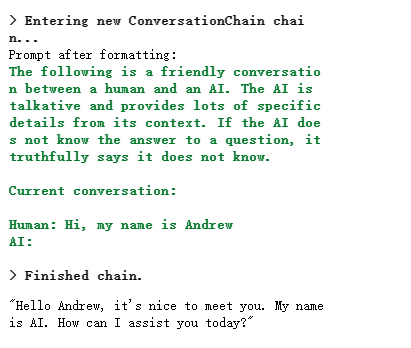

In [ ]:
conversation.predict(input="What is 1+1?")

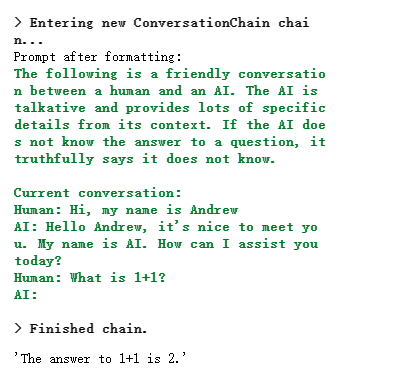

In [ ]:
conversation.predict(input="What is my name?")

In [ ]:
print(memory.buffer)

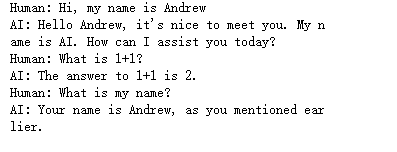

In [ ]:
memory.load_memory_variables({})

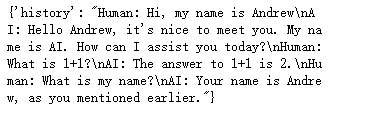

In [ ]:
memory = ConversationBufferMemory()

In [ ]:
memory.save_context({"input": "Hi"}, 
                    {"output": "What's up"})

In [ ]:
print(memory.buffer)

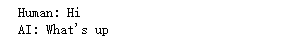

In [ ]:
memory.load_memory_variables({})

In [ ]:
memory.save_context({"input": "Not much, just hanging"}, 
                    {"output": "Cool"})

In [ ]:
memory.load_memory_variables({})

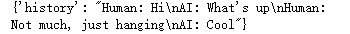

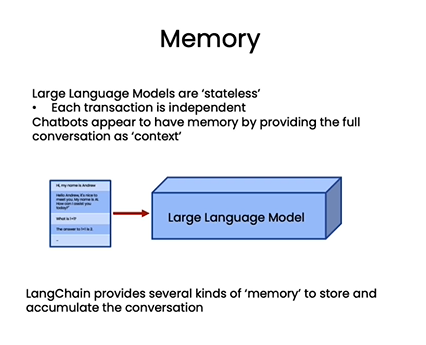

## ConversationBufferWindowMemory

In [1]:
from langchain.memory import ConversationBufferWindowMemory

In [ ]:
memory = ConversationBufferWindowMemory(k=1)               

In [ ]:
memory.save_context({"input": "Hi"},
                    {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})


In [ ]:
memory.load_memory_variables({})

Since ConversationBufferWindowMemory(k=1), it only remembers the most recent one
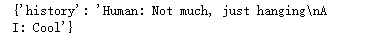

In [ ]:
llm = ChatOpenAI(temperature=0.0)
memory = ConversationBufferWindowMemory(k=1)
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=False
)

In [ ]:
conversation.predict(input="Hi, my name is Andrew")

In [ ]:
conversation.predict(input="What is 1+1?")

In [ ]:
conversation.predict(input="What is my name?")

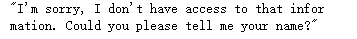

## ConversationTokenBufferMemory

In [ ]:
#!pip install tiktoken

In [ ]:
from langchain.memory import ConversationTokenBufferMemory
from langchain.llms import OpenAI
llm = ChatOpenAI(temperature=0.0)

In [ ]:
memory = ConversationTokenBufferMemory(llm=llm, max_token_limit=30)
memory.save_context({"input": "AI is what?!"},
                    {"output": "Amazing!"})
memory.save_context({"input": "Backpropagation is what?"},
                    {"output": "Beautiful!"})
memory.save_context({"input": "Chatbots are what?"}, 
                    {"output": "Charming!"})

In [ ]:
memory.load_memory_variables({})

Since we define max_token_limit=30, we can only return the recent 30 tokens.Remember, different LLM has different ways of caculating tokens

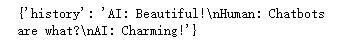

## ConversationSummaryMemory

In [ ]:
from langchain.memory import ConversationSummaryBufferMemory


In [ ]:
# create a long string
schedule = "There is a meeting at 8am with your product team. \
You will need your powerpoint presentation prepared. \
9am-12pm have time to work on your LangChain \
project which will go quickly because Langchain is such a powerful tool. \
At Noon, lunch at the italian resturant with a customer who is driving \
from over an hour away to meet you to understand the latest in AI. \
Be sure to bring your laptop to show the latest LLM demo."

memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=400)
memory.save_context({"input": "Hello"}, {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})
memory.save_context({"input": "What is on the schedule today?"}, 
                    {"output": f"{schedule}"})

#### If we use max_token_limit=400

In [ ]:
memory.load_memory_variables({})

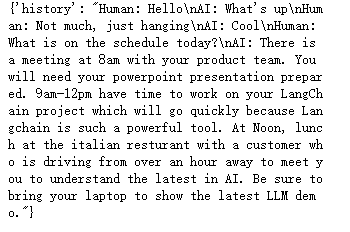

#### If we use max_token_limit=100, summary of schedule is provided!

In [ ]:
memory.load_memory_variables({})

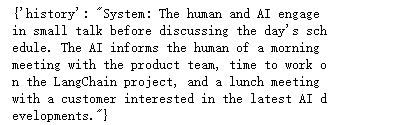

In [ ]:
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

In [ ]:
conversation.predict(input="What would be a good demo to show?")

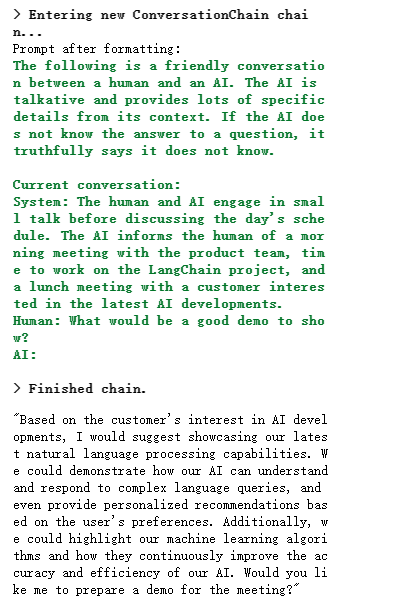

In [ ]:
memory.load_memory_variables({})

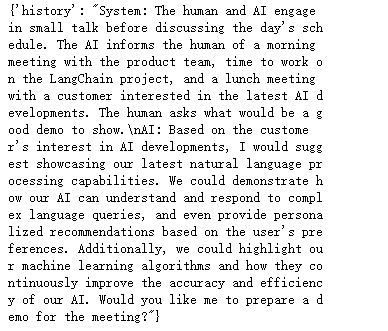